In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import re

In [3]:
df = pd.read_csv('UpdatedResumeDataSet.csv')

In [5]:
df['Category']

0      Data Science
1      Data Science
2      Data Science
3      Data Science
4      Data Science
           ...     
957         Testing
958         Testing
959         Testing
960         Testing
961         Testing
Name: Category, Length: 962, dtype: object

In [6]:
df['Resume']

0      Skills * Programming Languages: Python (pandas...
1      Education Details \r\nMay 2013 to May 2017 B.E...
2      Areas of Interest Deep Learning, Control Syste...
3      Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4      Education Details \r\n MCA   YMCAUST,  Faridab...
                             ...                        
957    Computer Skills: â¢ Proficient in MS office (...
958    â Willingness to accept the challenges. â ...
959    PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...
960    COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...
961    Skill Set OS Windows XP/7/8/8.1/10 Database MY...
Name: Resume, Length: 962, dtype: object

In [7]:
df.shape

(962, 2)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB


In [9]:
df.describe()

,Category,Resume
count,962,962
unique,25,166
top,Java Developer,"Technical Skills Web Technologies: Angular JS,..."
freq,84,18


# Exploring Categories

In [15]:
df['Category'].value_counts()

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64

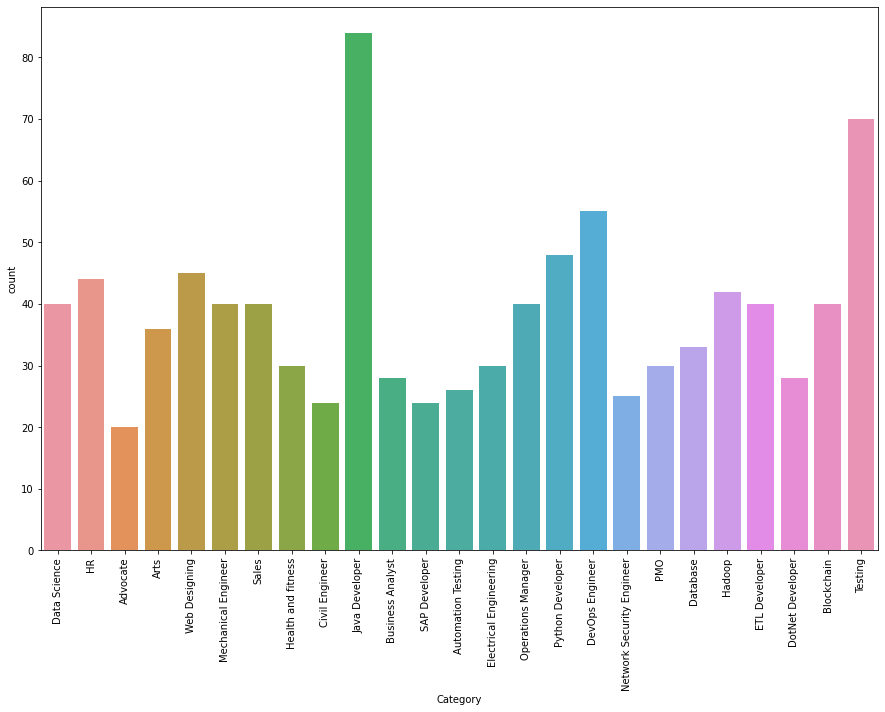

In [23]:
plt.figure(figsize=(15,10))
sns.countplot(x = df['Category'])
plt.xticks(rotation = 90)
plt.show()

In [27]:
counts = df['Category'].value_counts()

In [25]:
labels = df['Category'].unique()

In [26]:
labels

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

In [28]:
counts

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64

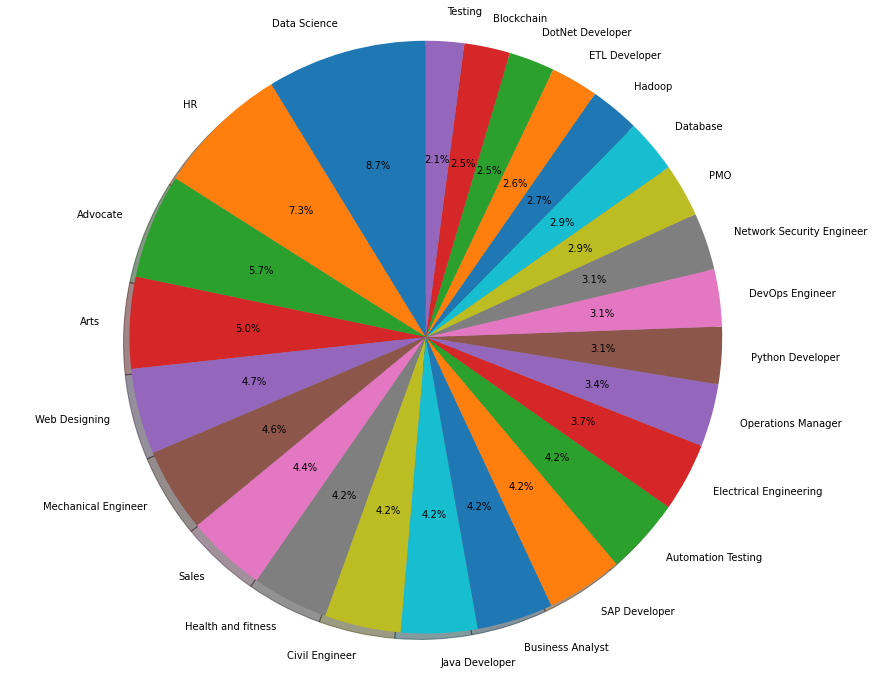

In [40]:
plt.figure(figsize=(15,12))
plt.pie(counts, labels = labels, autopct='%1.1f%%', startangle=90,  shadow=True)
plt.axis('equal')
plt.show()

In [39]:
# colors = ['#FF5733', '#33FF8C', '#336CFF', '#E433FF']

# plt.figure(figsize=(15,12))
# plt.pie(counts, labels = labels, colors = colors, autopct='%1.1f%%', startangle=90)
# plt.axis('equal')
# plt.show()

# Exploring Resume

In [41]:
df['Category'][0]

'Data Science'

In [49]:
# df['Resume'][0]

# Cleaing Data

1. Urls
2. Hashtags
3. Mentions
4. Special Char
5. Punctuations


In [44]:
import re

In [45]:
def clean_text(text):
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    
    # Remove hashtags and mentions
    text = re.sub(r'#\w+|\@\w+', '', text)
    
    # Remove special characters and punctuations (excluding spaces)
    text = re.sub(r'[^\w\s]', '', text)
    
    # Remove multiple spaces
    text = re.sub(r'\s+', ' ', text).strip()

    return text

In [51]:
text_to_clean = "Check out this cool website: https://www.example.com! #technology @user123"

clean_text(text_to_clean)

'Check out this cool website'

In [52]:
df['Filter_Resume'] = df['Resume'].apply(lambda x: clean_text(x))

In [53]:
df

,Category,Resume,Filter_Resume
0,Data Science,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 BE UITR...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills â R â Python â SAP HANA â Tableau â SAP...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...
...,...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...,Computer Skills â Proficient in MS office Word...
958,Testing,â Willingness to accept the challenges. â ...,â Willingness to accept the challenges â Posit...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...",PERSONAL SKILLS â Quick learner â Eagerness to...
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...,COMPUTER SKILLS SOFTWARE KNOWLEDGE MSPower Poi...


In [56]:
# df['Filter_Resume'][1]

# Words Into Catgorical Value

In [58]:
df['Category']

0      Data Science
1      Data Science
2      Data Science
3      Data Science
4      Data Science
           ...     
957         Testing
958         Testing
959         Testing
960         Testing
961         Testing
Name: Category, Length: 962, dtype: object

In [59]:
from sklearn.preprocessing import LabelEncoder

In [61]:
le = LabelEncoder()
le.fit(df['Category'])

LabelEncoder()

In [63]:
df['Encoded_Cate'] = le.fit_transform(df['Category'])

In [64]:
df

,Category,Resume,Filter_Resume,Encoded_Cate
0,Data Science,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...,6
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 BE UITR...,6
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...,6
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills â R â Python â SAP HANA â Tableau â SAP...,6
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...,6
...,...,...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...,Computer Skills â Proficient in MS office Word...,23
958,Testing,â Willingness to accept the challenges. â ...,â Willingness to accept the challenges â Posit...,23
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...",PERSONAL SKILLS â Quick learner â Eagerness to...,23
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...,COMPUTER SKILLS SOFTWARE KNOWLEDGE MSPower Poi...,23


In [72]:
sorted(df['Encoded_Cate'].unique())
# (df['Encoded_Cate'].unique())


[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24]

In [69]:
sorted(df['Category'].unique())

['Advocate',
 'Arts',
 'Automation Testing',
 'Blockchain',
 'Business Analyst',
 'Civil Engineer',
 'Data Science',
 'Database',
 'DevOps Engineer',
 'DotNet Developer',
 'ETL Developer',
 'Electrical Engineering',
 'HR',
 'Hadoop',
 'Health and fitness',
 'Java Developer',
 'Mechanical Engineer',
 'Network Security Engineer',
 'Operations Manager',
 'PMO',
 'Python Developer',
 'SAP Developer',
 'Sales',
 'Testing',
 'Web Designing']

-----------------------------------------------
TF-IDF Vectorizer converts text data into numerical vectors, capturing word importance in a document and the corpus. Useful for NLP tasks and ML text analysis.

# Vectorization

In [74]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words = 'english')

In [75]:
tfidf.fit(df['Filter_Resume'])

TfidfVectorizer(stop_words='english')

In [76]:
requ_text = tfidf.transform(df['Filter_Resume'])

In [77]:
requ_text

<962x7917 sparse matrix of type '<class 'numpy.float64'>'
	with 164421 stored elements in Compressed Sparse Row format>

# Splitting

In [85]:
from sklearn.model_selection import train_test_split

In [98]:
x_train, x_test, y_train, y_test = train_test_split(requ_text, df['Encoded_Cate'], test_size= 0.2, random_state= 3)

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Category       962 non-null    object
 1   Resume         962 non-null    object
 2   Filter_Resume  962 non-null    object
 3   Encoded_Cate   962 non-null    int32 
dtypes: int32(1), object(3)
memory usage: 26.4+ KB


In [100]:
x_train.shape

(769, 7917)

In [103]:
x_test.shape

(193, 7917)

In [105]:
y_test.shape

(193,)

In [106]:
y_train.shape

(769,)

# Model Evaluation and Training

In [107]:
from sklearn.neighbors import KNeighborsClassifier

In [108]:
knn_classifier = KNeighborsClassifier(n_neighbors=3)

# Fit the classifier to the training data
knn_classifier.fit(x_train, y_train)

# Make predictions on the test data
y_pred = knn_classifier.predict(x_test)

In [110]:
y_pred

array([17, 20,  5, 12, 23, 17, 15, 10, 20,  8, 22, 12, 17, 24, 13, 23,  3,
       16, 23, 14,  1, 15, 12, 17, 23,  1,  3,  2, 22, 16, 15, 20, 21,  8,
       13, 14,  3, 11, 11,  7, 16, 24,  0,  8, 22,  6, 15,  6, 13, 15, 15,
        9,  8, 23,  2, 13, 11,  7, 17,  8, 12, 13, 12, 17, 10, 24, 12,  7,
        2,  3, 12,  0, 16, 23,  2, 23,  8, 22, 23, 10,  8, 16,  8,  6, 20,
       22,  8, 14, 12, 15, 15, 24,  0,  6, 12,  8, 18,  2, 20, 16,  9, 18,
       18, 14,  5, 24, 23, 10, 18, 21, 17, 15,  0,  4, 10, 14, 10, 23, 20,
        2,  2, 16, 15, 22, 22, 15,  8,  0,  7,  5,  0, 24, 22, 13, 22,  3,
       12,  1,  1, 15,  4, 24, 20,  0, 23,  8, 20,  1,  9, 21,  9,  1, 18,
       18, 12,  7,  6, 10, 15, 12, 16,  7,  6, 16, 14, 15, 10, 20,  9,  4,
       14, 15,  7, 13,  3, 24, 11,  4, 21, 16, 12,  1,  3, 24, 18,  8, 16,
        0, 12,  6, 15,  1,  4])

In [112]:
from sklearn.metrics import accuracy_score, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Compute confusion matrix
# conf_matrix = confusion_matrix(y_test, y_pred)
# print("Confusion Matrix:")
# print(conf_matrix)

Accuracy: 0.9948186528497409


In [120]:
my_resume = """I am a Java developer with a strong expertise in designing and developing robust and scalable applications. Proficient in Java, Spring Framework, and Hibernate. I am passionate about building efficient and optimized code. Experienced in collaborating with cross-functional teams to deliver high-quality software solutions.

Contact & Sources
Email: johndoe@example.com
Phone: (555) 123-4567
Github: https://github.com/johndoe
LinkedIn: https://www.linkedin.com/in/johndoe
Blogs: https://medium.com/@johndoe

ABOUT ME
SKILLS
JOHN DOE
LANGUAGES
English
Spanish
I am a Java developer with expertise in building
efficient and scalable applications. I have a strong
command over Java, Spring Framework, and
Hibernate. I enjoy collaborating with teams and
delivering high-quality solutions.

Java
Spring Framework
Hibernate
RESTful APIs
Microservices Architecture
Database Design (SQL, NoSQL)
Unit Testing (JUnit)
Version Control (Git)
Maven
Communication and Teamwork
"""

In [122]:
test_res = """I am a data scientist specializing in machine
learning, deep learning, and computer vision. With
a strong background in mathematics, statistics,
and programming, I am passionate about
uncovering hidden patterns and insights in data.
I have extensive experience in developing
predictive models, implementing deep learning
algorithms, and designing computer vision
systems. My technical skills include proficiency in
Python, Sklearn, TensorFlow, and PyTorch.
What sets me apart is my ability to effectively
communicate complex concepts to diverse
audiences. I excel in translating technical insights
into actionable recommendations that drive
informed decision-making.
If you're looking for a dedicated and versatile data
scientist to collaborate on impactful projects, I am
eager to contribute my expertise. Let's harness the
power of data together to unlock new possibilities
and shape a better future.
Contact & Sources
Email: 611noorsaeed@gmail.com
Phone: 03442826192
Github: https://github.com/611noorsaeed
Linkdin: https://www.linkedin.com/in/noor-saeed654a23263/
Blogs: https://medium.com/@611noorsaeed
Youtube: Artificial Intelligence
ABOUT ME
WORK EXPERIENCE
SKILLES
NOOR SAEED
LANGUAGES
English
Urdu
Hindi
I am a versatile data scientist with expertise in a wide
range of projects, including machine learning,
recommendation systems, deep learning, and computer
vision. Throughout my career, I have successfully
developed and deployed various machine learning models
to solve complex problems and drive data-driven
decision-making
Machine Learnine
Deep Learning
Computer Vision
Recommendation Systems
Data Visualization
Programming Languages (Python, SQL)
Data Preprocessing and Feature Engineering
Model Evaluation and Deployment
Statistical Analysis
Communication and Collaboration
"""

In [158]:
test2 = """I am a Mechanical Engineer with a strong expertise in designing and developing innovative solutions. Skilled in CAD, Finite Element Analysis (FEA), and product development. Passionate about applying engineering principles to solve real-world challenges.

Contact & Sources
Email: johndoe@example.com
Phone: (555) 123-4567
Github: https://github.com/johndoe
LinkedIn: https://www.linkedin.com/in/johndoe
Blogs: https://medium.com/@johndoe

ABOUT ME
SKILLS
JOHN DOE
LANGUAGES
English
German
I am a dedicated Mechanical Engineer with a focus on innovation and design. Proficient in CAD and FEA, I excel in developing practical solutions to complex engineering problems.

CAD (Computer-Aided Design)
Finite Element Analysis (FEA)
Product Development
Mechanical Design
Simulation and Prototyping
Engineering Mathematics
Material Science
Project Management
Team Collaboration
"""

In [159]:
import pickle

pickle.dump(tfidf,open('tfidf.pkl', 'wb'))
pickle.dump(knn_classifier, open('knn_classifier.pkl', 'wb'))


In [160]:
import pickle

clf = pickle.load(open('knn_classifier.pkl', 'rb'))

cleaned_res = clean_text(test2)

input_feature = tfidf.transform([cleaned_res])

pred_id = clf.predict(input_feature)[0]

# print(pred_id)

cate_mapping = {
    15: "Java Developer",
    23: "Testing",
    8: "DevOps Engineer",
    20: "Python Developer",
    24: "Web Designing",
    12: "HR",
    13: "Hadoop",
    3: "Blockchain",
    10: "ETL Developer",
    18: "Operations Manager",
    6: "Data Science",
    22: "Sales",
    16: "Mechanical Engineer",
    1: "Arts",
    7: "Database",
    11: "Electrical Engineering",
    14: "Health and fitness",
    19: "PMO",
    4: "Business Analyst",
    9: "DotNet Developer",
    2: "Automation Testing",
    17: "Network Security Engineer",
    21: "SAP Developer",
    5: "Civil Engineer",
    0: "Advocate",
}

cate_name = cate_mapping.get(pred_id, "Unknown")

print("Prediction Category :", cate_name + " /// "+" Prediction Id : ",  pred_id)



Prediction Category : Mechanical Engineer ///  Prediction Id :  16
